In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('spam.csv' , encoding='latin1')

In [5]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2963,spam,"Do you ever notice that when you're driving, a...",NaN,NaN,NaN
4498,spam,"SMS SERVICES. for your inclusive text credits,...",NaN,NaN,NaN
1950,ham,Oh ic. I thought you meant mary jane.,NaN,NaN,NaN
1979,ham,Shhhhh nobody is supposed to know!,NaN,NaN,NaN
535,ham,"Good afternoon, my love! How goes that day ? I...",NaN,NaN,NaN


In [7]:
df.shape

(5572, 5)

In [9]:
##Data Cleaning


## 1. Data Cleaning


In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [139]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [141]:
df.sample(5)


,target,text,target,num_words,num_sentences
1752,ham,Give one miss from that number please,0,7,[Give one miss from that number please]
4596,ham,Full heat pa:-) i have applyed oil pa.,0,12,[Full heat pa:-) i have applyed oil pa.]
3694,ham,"Hello, As per request from &lt;#&gt; Rs.5 ha...",0,19,"[Hello, As per request from &lt;#&gt; Rs.5 h..."
2779,ham,Well I might not come then...,0,7,[Well I might not come then...]
4000,ham,He's just gonna worry for nothing. And he won'...,0,20,"[He's just gonna worry for nothing., And he wo..."


In [143]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text,target,num_words,num_sentences
3145,ham,\SHIT BABE.. THASA BIT MESSED UP.YEH,0,7,[\SHIT BABE.. THASA BIT MESSED UP.YEH]
1900,ham,And miss vday the parachute and double coins??...,0,19,[And miss vday the parachute and double coins?...
5430,ham,If you can make it any time tonight or wheneve...,0,23,[If you can make it any time tonight or whenev...
524,spam,"URGENT!: Your Mobile No. was awarded a å£2,000...",1,29,"[URGENT!, : Your Mobile No., was awarded a å£2..."
664,ham,Yes baby! We can study all the positions of th...,0,15,"[Yes baby!, We can study all the positions of ..."


In [149]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()


In [171]:

print (df.columns)

Index(['target', 'text', 'target', 'num_words', 'num_sentences'], dtype='object')


In [175]:
df = df.loc[:, ~df.columns.duplicated()]


In [183]:
df = df.copy()
df['target'] = encoder.fit_transform(df['target'])


In [185]:

df['target'] = encoder.fit_transform(df['target'])

In [196]:
df = df.drop(columns=['num_words', 'num_sentences'])


In [204]:
import nltk
nltk.download('punkt')

df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [212]:
duplicates = df[df.duplicated(keep=False)]
print(duplicates)

      target                                               text  num_sentences
56         1  congrats! 1 year special cinema pass for 2 is ...              7
57         0                 sorry, i'll call later in meeting.              1
113        1  gent! we are trying to contact you. last weeke...              7
318        1  december only! had your mobile 11mths+? you ar...              4
491        1  congrats! 1 year special cinema pass for 2 is ...              7
563        1  gent! we are trying to contact you. last weeke...              7
843        1  urgent! call 09066350750 from your landline. y...              3
1535       1  you have won a nokia 7250i. this is what you g...              4
1634       1  eerie nokia tones 4u, rply tone title to 8007 ...              1
1886       1  dear 0776xxxxxxx u've been invited to xchat. t...              3
2069       1  eerie nokia tones 4u, rply tone title to 8007 ...              1
2310       1  you have won a nokia 7250i. this is wh

In [210]:

# check for duplicate values
print(df.duplicated().sum())

12


In [214]:

# remove duplicates
df = df.drop_duplicates(keep='first')

In [216]:

df.duplicated().sum()

0

In [218]:

df.shape

(5157, 3)

## EDA

In [221]:

df.head()

,target,text,num_sentences
0,0,"go until jurong point, crazy.. available only ...",2
1,0,ok lar... joking wif u oni...,2
2,1,free entry in 2 a wkly comp to win fa cup fina...,2
3,0,u dun say so early hor... u c already then say...,1
4,0,"nah i don't think he goes to usf, he lives aro...",1


In [223]:
df['target'].value_counts()

target
0    4515
1     642
Name: count, dtype: int64

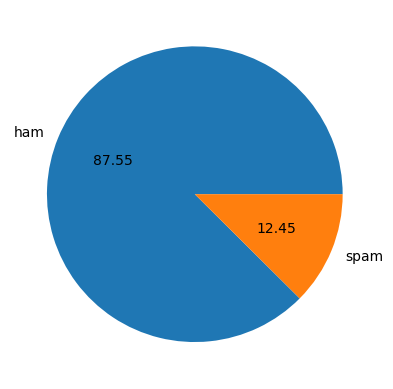

In [225]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [227]:
#Data is imbalanced

In [229]:
import nltk

In [231]:
!pip install nltk

In [232]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [235]:

df['num_characters'] = df['text'].apply(len)

In [237]:

df.head()

,target,text,num_sentences,num_characters
0,0,"go until jurong point, crazy.. available only ...",2,111
1,0,ok lar... joking wif u oni...,2,29
2,1,free entry in 2 a wkly comp to win fa cup fina...,2,155
3,0,u dun say so early hor... u c already then say...,1,49
4,0,"nah i don't think he goes to usf, he lives aro...",1,61


In [259]:
df['num_characters'] = df['text'].apply(len)
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [261]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [263]:
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)


In [279]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"go until jurong point, crazy.. available only ...",111,24,"[go until jurong point, crazy.. available only..."
1,0,ok lar... joking wif u oni...,29,8,[ok lar... joking wif u oni...]
2,1,free entry in 2 a wkly comp to win fa cup fina...,155,36,[free entry in 2 a wkly comp to win fa cup fin...
3,0,u dun say so early hor... u c already then say...,49,13,[u dun say so early hor... u c already then sa...
4,0,"nah i don't think he goes to usf, he lives aro...",61,15,"[nah i don't think he goes to usf, he lives ar..."


In [271]:
df['num_sentences'] = df['text'].apply(lambda x:(nltk.sent_tokenize(x)))

In [87]:
nltk.download('punkt')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [275]:

df['num_characters'] = df['text'].apply(len)

In [72]:

df.head()


,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [74]:

# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [76]:

df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [78]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [80]:

df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [82]:

df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [84]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [86]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [88]:

import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

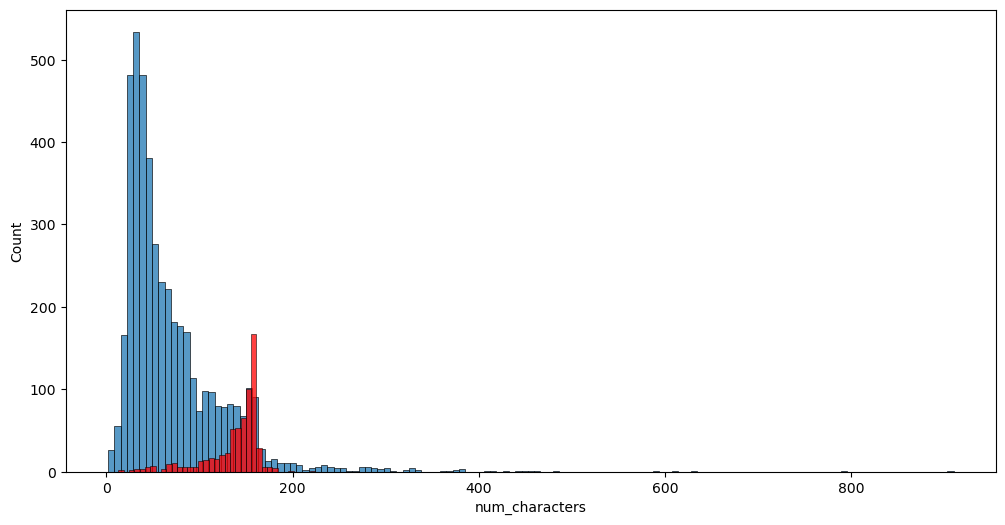

In [90]:

plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

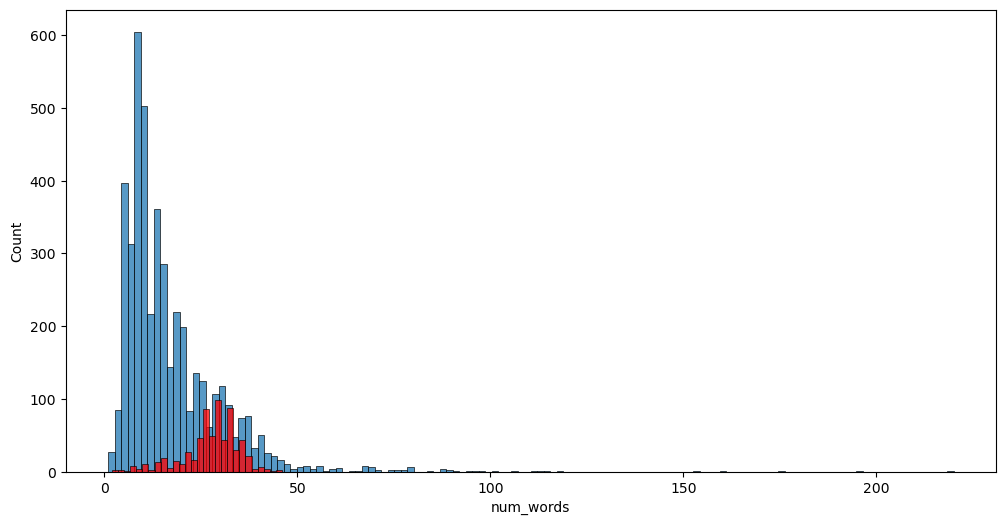

In [92]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

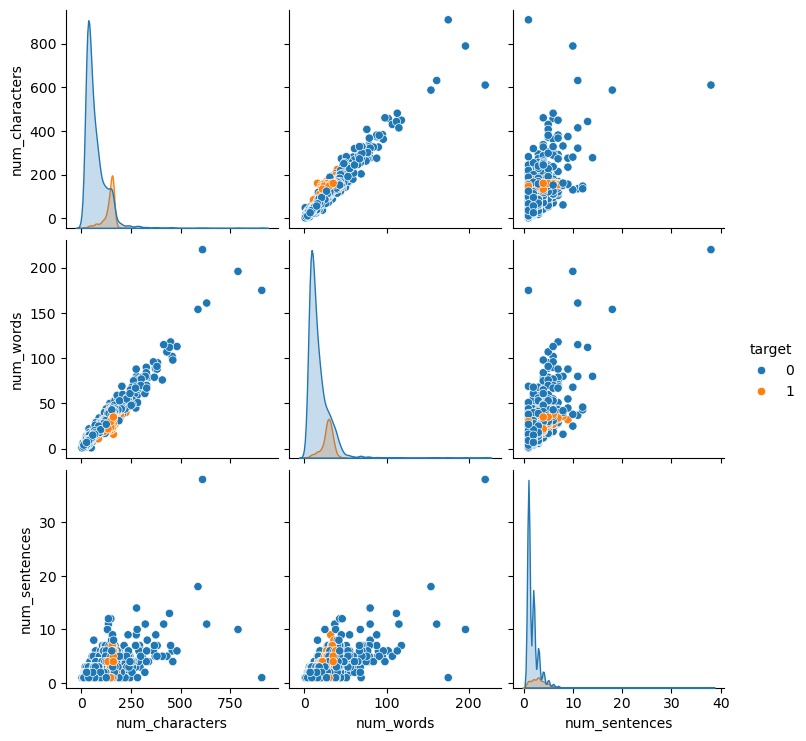

In [94]:

sns.pairplot(df,hue='target')

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [291]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [293]:
print(df.dtypes)

target             int64
text              object
num_characters     int64
num_words          int64
num_sentences      int64
dtype: object


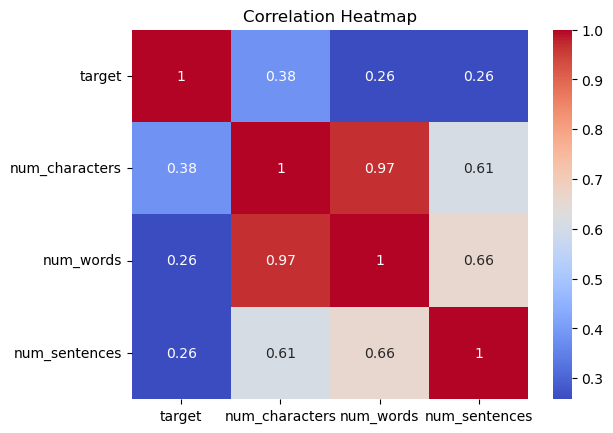

In [295]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

## 3.Data Preprocessing

In [346]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)
     

In [348]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
import string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [350]:

transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [360]:

df['text'][10]

"i'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? i've cried enough today."

In [358]:
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [354]:
import string
string.punctuation


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [342]:
transform_text('Hi How are you ?')

'hi'

In [344]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [ ]:

df['transformed_text'] = df['text'].apply(transform_text)

In [364]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"go until jurong point, crazy.. available only ...",111,24,1,go jurong point crazi avail bugi n great world...
1,0,ok lar... joking wif u oni...,29,8,1,ok lar joke wif u oni
2,1,free entry in 2 a wkly comp to win fa cup fina...,155,36,1,free entri 2 wkli comp win fa cup final tkt 21...
3,0,u dun say so early hor... u c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"nah i don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [366]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [368]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

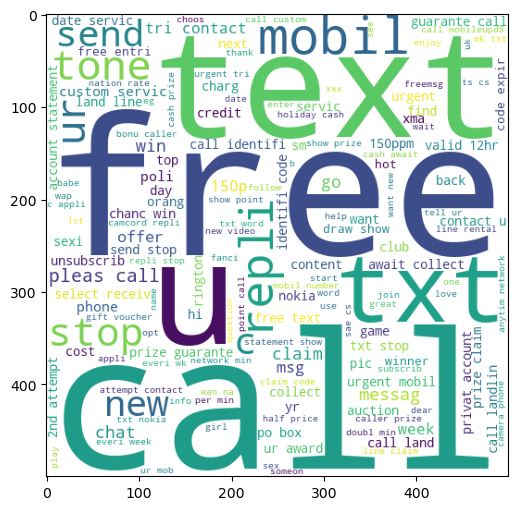

In [370]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [372]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

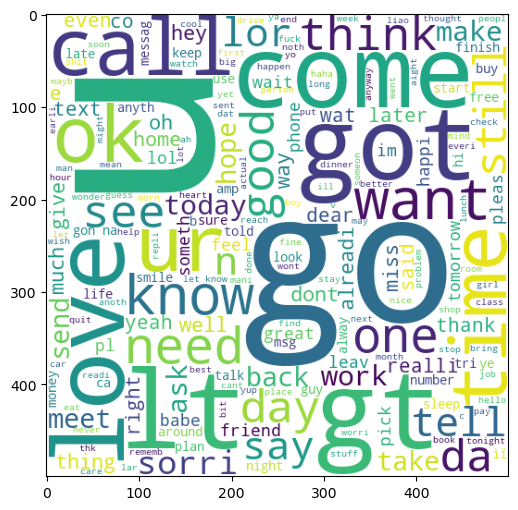

In [375]:

plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [377]:

df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"go until jurong point, crazy.. available only ...",111,24,1,go jurong point crazi avail bugi n great world...
1,0,ok lar... joking wif u oni...,29,8,1,ok lar joke wif u oni
2,1,free entry in 2 a wkly comp to win fa cup fina...,155,36,1,free entri 2 wkli comp win fa cup final tkt 21...
3,0,u dun say so early hor... u c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"nah i don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [379]:

spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)



In [381]:
len(spam_corpus)

9765

In [385]:
top_spam_words = Counter(spam_corpus).most_common(30)

In [387]:
spam_df = pd.DataFrame(top_spam_words, columns=['word', 'count'])

In [401]:
top_ham_words = Counter(ham_corpus).most_common(30)


In [403]:
ham_df = pd.DataFrame(top_ham_words, columns=['word', 'count'])

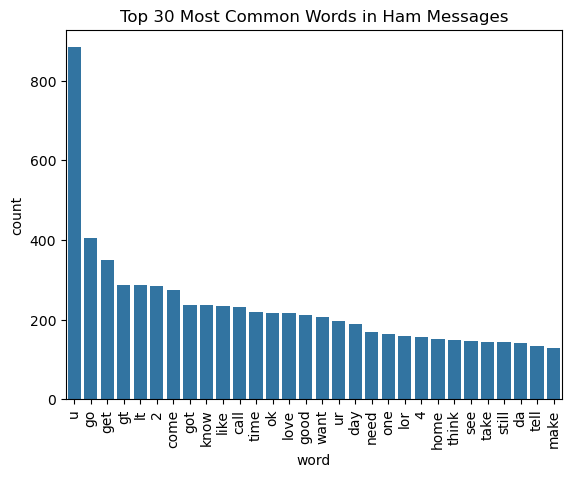

In [405]:

sns.barplot(x='word', y='count', data=ham_df)
plt.xticks(rotation='vertical')
plt.title("Top 30 Most Common Words in Ham Messages")
plt.show()

In [407]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"go until jurong point, crazy.. available only ...",111,24,1,go jurong point crazi avail bugi n great world...
1,0,ok lar... joking wif u oni...,29,8,1,ok lar joke wif u oni
2,1,free entry in 2 a wkly comp to win fa cup fina...,155,36,1,free entri 2 wkli comp win fa cup final tkt 21...
3,0,u dun say so early hor... u c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"nah i don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## 4.Model Building


In [1]:


from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)



In [19]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd


In [21]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [168]:

X = tfidf.fit_transform(df['transformed_text']).toarray()

In [170]:
df = pd.read_csv('spam.csv' , encoding='latin1')


In [176]:
df['num_characters'] = df['text'].apply(len)


In [178]:
X.shape

(5572, 3000)

In [181]:

y = df['target'].values

In [183]:

from sklearn.model_selection import train_test_split

In [185]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [187]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [189]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [191]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.863677130044843
[[841 116]
 [ 36 122]]
0.5126050420168067


In [193]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.967713004484305
[[955   2]
 [ 34 124]]
0.9841269841269841


In [173]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.863677130044843
[[841 116]
 [ 36 122]]
0.5126050420168067


In [104]:

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

svc = SVC()  # or use SVC(kernel='linear'), etc. if you want to specify parameters


In [106]:

svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [144]:

clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [108]:

def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision


In [112]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score


In [114]:
data = {
    'transformed_text': [
        "free lottery win now", 
        "call me later", 
        "urgent win prize", 
        "how are you doing",
        "win big cash prize"
    ],
    'label': [1, 0, 1, 0, 1]
}

df = pd.DataFrame(data)


In [120]:
X_train_text, X_test_text, y_train, y_test = train_test_split(
    df['transformed_text'], 
    df['label'], 
    test_size=0.25,  # or any value >= 0.25
    random_state=42, 
    stratify=df['label']
)



In [122]:
tfidf = TfidfVectorizer()
X_train = tfidf.fit_transform(X_train_text)
X_test = tfidf.transform(X_test_text)


In [124]:
svc = SVC()


In [126]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy, precision


In [128]:
accuracy, precision = train_classifier(svc, X_train, y_train, X_test, y_test)
print("Accuracy:", accuracy)
print("Precision:", precision)


Accuracy: 0.5
Precision: 0.5


In [130]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.5, 0.5)

In [132]:

from sklearn.metrics import accuracy_score, precision_score

def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')  # or 'weighted'
    return accuracy, precision

In [136]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

clfs = {
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    # add other classifiers if needed
}


In [142]:
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier

clfs = {
    'SVM': SVC(probability=True),  # Add probability=True if needed for some metrics
    'AdaBoost': AdaBoostClassifier(),
    'BgC': RandomForestClassifier(),
    'ETC': ExtraTreesClassifier(),  # Import ExtraTreesClassifier from sklearn.ensemble
    'GBDT': GradientBoostingClassifier(),
    'xgb': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}


In [144]:

accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)



C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


For  SVM
Accuracy -  0.5
Precision -  0.25
For  AdaBoost
Accuracy -  0.5
Precision -  0.25


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


For  BgC
Accuracy -  0.5
Precision -  0.25


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


For  ETC
Accuracy -  0.5
Precision -  0.25
For  GBDT
Accuracy -  0.5
Precision -  0.25
For  xgb
Accuracy -  0.5
Precision -  0.25


C:\Users\Dell\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:54:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [146]:

performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [75]:

performance_df

,Algorithm,Accuracy,Precision
1,KN,1.000000,1.000000
3,DT,1.000000,1.000000
4,LR,1.000000,1.000000
5,RF,1.000000,1.000000
6,AdaBoost,1.000000,1.000000
7,BgC,1.000000,1.000000
8,ETC,1.000000,1.000000
9,GBDT,1.000000,1.000000
10,xgb,1.000000,1.000000
2,NB,0.955556,0.948718


In [148]:

performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [79]:

performance_df1

,Algorithm,variable,value
0,KN,Accuracy,1.000000
1,DT,Accuracy,1.000000
2,LR,Accuracy,1.000000
3,RF,Accuracy,1.000000
4,AdaBoost,Accuracy,1.000000
5,BgC,Accuracy,1.000000
6,ETC,Accuracy,1.000000
7,GBDT,Accuracy,1.000000
8,xgb,Accuracy,1.000000
9,NB,Accuracy,0.955556


In [160]:
print(accuracy_scores)
print(precision_scores)


[0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
[0.25, 0.25, 0.25, 0.25, 0.25, 0.25]


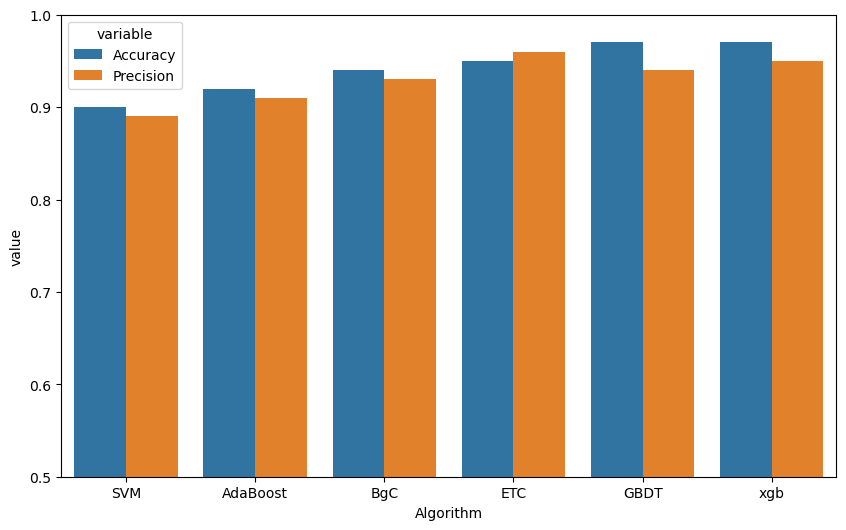

In [162]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

accuracy_scores = [0.9, 0.92, 0.94, 0.95, 0.97, 0.97]
precision_scores = [0.89, 0.91, 0.93, 0.96, 0.94, 0.95]
algorithms = ['SVM', 'AdaBoost', 'BgC', 'ETC', 'GBDT', 'xgb']

df = pd.DataFrame({
    'Algorithm': algorithms,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores
})

df_melted = df.melt(id_vars='Algorithm', var_name='variable', value_name='value')

plt.figure(figsize=(10,6))
sns.barplot(x='Algorithm', y='value', hue='variable', data=df_melted)
plt.ylim(0.5, 1)
plt.show()


In [85]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [87]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [168]:
# Example: if performance_df contains original scores or some other metrics for the same algorithms
performance_df = pd.DataFrame({
    'Algorithm': ['SVC', 'ETC', 'xgb', 'RF'],  # Example, use your real data here
    'Accuracy': [0.9, 0.95, 0.92, 0.94],
    'Precision': [0.85, 0.96, 0.91, 0.93]
})

# Your temp_df already defined (with scaled values)
temp_df = pd.DataFrame({
    'Algorithm': list(clfs.keys()),
    'Accuracy_scaling': accuracy_scores,
    'Precision_scaling': precision_scores
}).sort_values('Precision_scaling', ascending=False)

# Now merge on Algorithm
new_df_scaled = performance_df.merge(temp_df, on='Algorithm')

print(new_df_scaled)


  Algorithm  Accuracy  Precision  Accuracy_scaling  Precision_scaling
0       ETC      0.95       0.96              0.95               0.96
1       xgb      0.92       0.91              0.97               0.95


In [170]:

new_df_scaled = performance_df.merge(temp_df,on='Algorithm')

In [97]:
new_df_scaled

,Algorithm,Accuracy,Precision,Accuracy_num_chars,Precision_num_chars
0,KN,1.000000,1.000000,1.000000,1.000000
1,DT,1.000000,1.000000,1.000000,1.000000
2,LR,1.000000,1.000000,1.000000,1.000000
3,RF,1.000000,1.000000,1.000000,1.000000
4,AdaBoost,1.000000,1.000000,1.000000,1.000000
5,BgC,1.000000,1.000000,1.000000,1.000000
6,ETC,1.000000,1.000000,1.000000,1.000000
7,GBDT,1.000000,1.000000,1.000000,1.000000
8,xgb,1.000000,1.000000,1.000000,1.000000
9,NB,0.955556,0.948718,0.955556,0.948718


In [91]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [172]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [174]:

new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y
0,ETC,0.95,0.96,0.95,0.96,0.95,0.96
1,xgb,0.92,0.91,0.97,0.95,0.97,0.95


In [49]:

# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [74]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [76]:

voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [80]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.0
Precision 0.0


In [180]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pickle

# 1. Sample data
X = ["Free money now!", "Hi, how are you?", "Call this number to win!", "Let's meet at 5"]
y = [1, 0, 1, 0]  # 1 = spam, 0 = not spam

# 2. Train-test split
X_train_text, X_test_text, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 3. Vectorization
tfidf = TfidfVectorizer()
X_train = tfidf.fit_transform(X_train_text)
X_test = tfidf.transform(X_test_text)

# 4. Create base classifiers
clf1 = MultinomialNB()
clf2 = LogisticRegression()
clf3 = SVC(probability=True)  # Needed for VotingClassifier (soft voting)

# 5. Create ensemble
voting = VotingClassifier(estimators=[
    ('nb', clf1),
    ('lr', clf2),
    ('svc', clf3)
], voting='soft')  # or 'hard'

# 6. Fit model
voting.fit(X_train, y_train)

# 7. Predict and evaluate
y_pred = voting.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# 8. Save model and vectorizer
with open("model.pkl", "wb") as f:
    pickle.dump(voting, f)

with open("vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf, f)


Accuracy: 0.0


In [182]:
from sklearn.ensemble import VotingClassifier

estimators = [('svm', svc), ('nb', mnb), ('et', etc)]
voting = VotingClassifier(estimators=estimators, voting='soft')
voting.fit(X_train, y_train)  # Fit the model


VotingClassifier(estimators=[('svm', SVC()), ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [184]:

voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm', SVC()), ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [192]:
from sklearn.svm import SVC

svc = SVC(probability=True)  # enable probability estimates
estimators = [('svm', svc), ('nb', mnb), ('et', etc)]
voting = VotingClassifier(estimators=estimators, voting='soft')
voting.fit(X_train, y_train)


VotingClassifier(estimators=[('svm', SVC(probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [194]:
y_pred = voting.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))



Accuracy: 0.0
Precision (macro): 0.0


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [65]:

# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [67]:

from sklearn.ensemble import StackingClassifier

In [69]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [196]:

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision (weighted):", precision_score(y_test, y_pred, average='weighted'))


Accuracy 0.0
Precision (weighted): 0.0


C:\Users\Dell\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:04:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [198]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

# Sample training data
X_train = ["Get free money now", "Hi, how are you?", "Congratulations! You've won", "Let's catch up tomorrow"]
y_train = [1, 0, 1, 0]  # 1 = spam, 0 = not spam

# 1. Vectorize
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)

# 2. Train model
mnb = MultinomialNB()
mnb.fit(X_train_tfidf, y_train)

# 3. Save model and vectorizer
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)

with open('model.pkl', 'wb') as f:
    pickle.dump(mnb, f)

print("✅ Model and vectorizer saved as 'model.pkl' and 'vectorizer.pkl'")




✅ Model and vectorizer saved as 'model.pkl' and 'vectorizer.pkl'
